In [1]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import mnist
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
((X_train, Y_train), (X_test, Y_test)) = mnist.load_data()
X_train = X_train.reshape((X_train.shape[0], 28 * 28 * 1))
X_test = X_test.reshape((X_test.shape[0], 28 * 28 * 1))
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

In [3]:
lb = LabelBinarizer()
Y_train = lb.fit_transform(Y_train)
Y_test = lb.transform(Y_test)

In [4]:
model = Sequential()
model.add(Dense(128, input_shape=(784,), activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(10, activation="softmax"))

In [5]:
sgd = SGD(0.2)
epochs=20
model.compile(loss="categorical_crossentropy", optimizer=sgd,metrics=["accuracy"])
H = model.fit(X_train, Y_train, validation_data=(X_test, Y_test),epochs=epochs, batch_size=128)

Epoch 1/20
469/469 [==============================] - 3s 5ms/step - loss: 0.3661 - accuracy: 0.8921 - val_loss: 0.1772 - val_accuracy: 0.9506
Epoch 2/20
469/469 [==============================] - 2s 4ms/step - loss: 0.1542 - accuracy: 0.9540 - val_loss: 0.1268 - val_accuracy: 0.9615
Epoch 3/20
469/469 [==============================] - 2s 4ms/step - loss: 0.1099 - accuracy: 0.9670 - val_loss: 0.1146 - val_accuracy: 0.9631
Epoch 4/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0848 - accuracy: 0.9742 - val_loss: 0.0943 - val_accuracy: 0.9716
Epoch 5/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0694 - accuracy: 0.9793 - val_loss: 0.1018 - val_accuracy: 0.9669
Epoch 6/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0579 - accuracy: 0.9822 - val_loss: 0.0790 - val_accuracy: 0.9760
Epoch 7/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0494 - accuracy: 0.9850 - val_loss: 0.0748 - val_accuracy: 0.9763
Epoch 

In [6]:
predictions = model.predict(X_test, batch_size=128)
print(classification_report(Y_test.argmax(axis=1),predictions.argmax(axis=1),target_names=[str(x) for x in lb.classes_]))


79/79 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.97      0.99      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.99      0.96      0.98       892
           6       0.98      0.98      0.98       958
           7       0.99      0.97      0.98      1028
           8       0.97      0.98      0.98       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



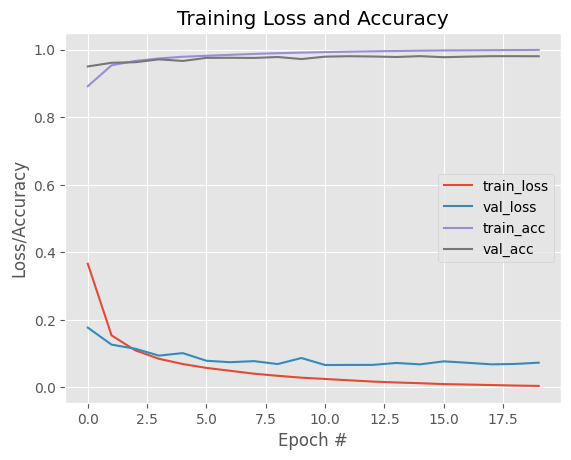

In [7]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, epochs), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, epochs), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, epochs), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, epochs), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()